In [2]:
import numpy as np
from qutip import*
import matplotlib.pyplot as plt
sqrt = np.sqrt
pi   = np.pi
class Add_gate:
    def __init__(gate, name, Tar_Con, angle):
        gate.name    = name
        gate.Tar_Con = Tar_Con
        gate.angle   = angle
                
Nqubits= 2
Nlevels= 3
Paulis_gt = 2.00e-8
CZ_gt = 2.50e-7
Diss = [35.98e-6, 36.24e-6]
Deph = [38.74e-6, 39.34e-6]
Alpha = -2*pi*200e6
ZZ_list = [[0,1]]
ZZ_strength = [2*pi*100e3]

In [3]:
# Import the developed package
import Chalmers_Simulator_mesolve as CS

The quantum gates which are modelled in this code and their notations-
--------------------------------------------------------------------------------
Pauli X 		 PX
Pauli Y 		 PY
Pauli Z 		 PZ
Hadamard 		 HD


Controlled Z 		 CZ 		 Format:Tar_Con=[[control, target]]
Controlled CZS 		 CCZS 		 Format:Tar_Con=[[control, target1, target2, phi]]


In [4]:
# Create Hamiltonian and collapse operators
Hamiltonian, c_ops = CS.create_system_Hamiltonian(Nqubits, Nlevels, Paulis_gt, CZ_gt, 0, Alpha, Diss, \
                                                  Deph, Texc = [], ZZ_list=[], ZZ_strength=[])

In [5]:
# Specify the confusion matrix and Initial state
CF00 = [0.968, 0.020, 0.011, 0.000]
CF01 = [0.059, 0.930, 0.010, 0.011]
CF10 = [0.059, 0.001, 0.921, 0.019]
CF11 = [0.040, 0.057, 0.056, 0.884]
CM = Qobj([CF00, CF01, CF10, CF11])

Theta_range= np.linspace(0,2*pi,50)
Ini = tensor(basis(3,0), basis(3,0))

coeff = [-1.0537076071291114, 0.3939836794385142, -0.3939836794385142, \
         -0.011236585233181995, 0.181288808211496]

In [6]:
cost = []
for i, theta in enumerate(Theta_range):
    
    # Quantum circuit
    gate=[]
    gate.append(Add_gate(name=["PX" , "HD"], Tar_Con=[0,1],   angle=[pi, 0]           ))
    gate.append(Add_gate(name=["PX" , "PZ"], Tar_Con=[0,1],   angle=[pi/2, theta]     ))
    gate.append(Add_gate(name=["HD"       ], Tar_Con=[1],     angle=[0]               ))
    gate.append(Add_gate(name=["CZ"       ], Tar_Con=[[0,1]], angle=[0]               ))
    gate.append(Add_gate(name=["PX"       ], Tar_Con=[0],     angle=[-pi/2]           ))
    fstate = CS.Execute(Hamiltonian, c_ops, gate, Ini)    
    
    # Measurement
    gate=[]
    gate.append(Add_gate(name=["I" , "I"],  Tar_Con=[0,1],   angle=[0, 0]           ))
    gate.append(Add_gate(name=["I" , "PZ"], Tar_Con=[0,1],   angle=[0, 0]           ))
    gate.append(Add_gate(name=["PZ" , "I"], Tar_Con=[0,1],   angle=[0, 0]           ))
    gate.append(Add_gate(name=["PZ" , "PZ"],Tar_Con=[0,1],   angle=[0, 0]           ))
    gate.append(Add_gate(name=["PY" , "PY"],Tar_Con=[0,1],   angle=[-pi/2, -pi/2]     ))
    cost.append(np.sum(np.real(CS.Measurement(Hamiltonian, fstate, gate, CM, coeff))))
    if np.mod(i+1, 10) == 0:
        print(i+1, 'of', len(Theta_range), 'completed')

10 of 50 completed
20 of 50 completed
30 of 50 completed
40 of 50 completed
50 of 50 completed


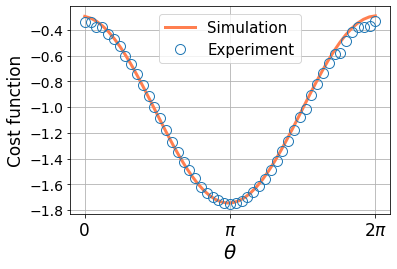

In [24]:
import pickle
with open('Cost_func_expt','rb') as read_file:
    expt = pickle.load(read_file)
theta_expt = np.linspace(0,2*pi,len(expt))


# Plot the results
plt.plot(Theta_range, cost, linewidth = 3, label = 'Simulation', color='coral')

# Experimental results
plt.plot(theta_expt, expt,'o', markersize = 10, markerfacecolor='None', label= 'Experiment')
plt.grid('on')
plt.legend(loc= 'upper center', fontsize = 15)
plt.xlabel(r'$\theta$', fontsize = 20)
plt.ylabel("Cost function", fontsize = 17);
plt.xticks([0,pi,2*pi], [0,r'$\pi$',r'$2\pi$'], fontsize = 17)
plt.yticks(fontsize = 14)
plt.subplots_adjust(left=0.16)
plt.subplots_adjust(bottom=0.16)
plt.savefig("Hydrogen.pdf")

In [25]:
print("RESULTS")
print("-"*50)
print("Minimum energy (THEORY)\t:", np.round(np.min(cost),4))
print("Minimum energy (EXPT)\t:", np.round(np.min(expt),4))
print("-"*50)

RESULTS
--------------------------------------------------
Minimum energy (THEORY)	: -1.7457
Minimum energy (EXPT)	: -1.7563
--------------------------------------------------
